<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.0 - Exploratory data analysis
</div>

## Import

In [58]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# If you need other libraries, you can import them here
import seaborn as sns
# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# nltk.download('stopwords')
# nltk.download('punkt')
from wordcloud import WordCloud
from nltk import pos_tag
import spacy
from collections import Counter
import re

In [59]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
# Tải model ngôn ngữ tiếng Anh của spaCy
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vobahoangnhat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vobahoangnhat/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Exploring data

### Read 2 cleaned data from file

We can now use the cleaned dataset for analysis. Thus, we first read the CSV files we created in the previous pre-processing task.

In [60]:
# YOUR CODE HERE
cleaned_videos_df=pd.read_csv('../data/processed/df_videos_processed.csv',lineterminator='\n')
cleaned_comments_df=pd.read_csv('../data/processed/df_comments_processed.csv',lineterminator='\n')

### Exploring general data

#### Videos section

In [61]:
# TEST VIDEOS
cleaned_videos_df.head()

,video_id,title,published,view_count,like_count,comment_count,duration,definition,tags,default_audio_language,madeforkid,playlist_title,channelTitle,playlist_published,playlist_numvideo
0,H_8ZVRRtiIA,"#1 AI for Good Specialization [Course 1, Week ...",2023-11-17 21:49:15+00:00,1671,34.0,1.0,0 days 00:10:01,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0
1,bZwkaVnhEo4,"#2 AI for Good Specialization [Course 1, Week ...",2023-07-27 16:54:21+00:00,1299,18.0,1.0,0 days 00:07:12,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0
2,hkOosfWxBK4,"#3 AI for Good Specialization [Course 1, Week ...",2023-11-17 20:13:19+00:00,584,20.0,2.0,0 days 00:03:47,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0
3,OIavgUGg7mc,"#4 AI for Good Specialization [Course 1, Week ...",2023-07-27 16:54:56+00:00,619,10.0,0.0,0 days 00:04:49,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0
4,eZZwySXsj-g,"#5 AI for Good Specialization [Course 1, Week ...",2023-07-27 16:55:12+00:00,579,3.0,0.0,0 days 00:05:36,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0


In [62]:
# Shape of the dataframe
cleaned_videos_df.shape

(7610, 15)

In [63]:
# Some information about the dataframe
cleaned_videos_df.dtypes

video_id                   object
title                      object
published                  object
view_count                  int64
like_count                float64
comment_count             float64
duration                   object
definition                 object
tags                       object
default_audio_language     object
madeforkid                   bool
playlist_title             object
channelTitle               object
playlist_published         object
playlist_numvideo         float64
dtype: object

- We can see `published` and `playlist_published` need to change dtype to **datetime** and duration to **deltatime** like previous pre-processsing task.

In [64]:
cleaned_videos_df['published'] =  cleaned_videos_df['published'].apply(pd.to_datetime)
cleaned_videos_df['duration'] = cleaned_videos_df['duration'].apply(pd.to_timedelta)
cleaned_videos_df['playlist_published'] = cleaned_videos_df['playlist_published'].apply(pd.to_datetime)

In [65]:
#Test again
cleaned_videos_df[['published','duration','playlist_published']].dtypes

published             datetime64[ns, UTC]
duration                  timedelta64[ns]
playlist_published    datetime64[ns, UTC]
dtype: object

- Next, let's explore this data by individual data groups
    - Numerical:`view_count`, `like_count`, `comment_count`, `playlist_numvideo`
    - Non-numerical: the other columns

In [66]:
numerical_features = ['view_count', 'like_count','comment_count','playlist_numvideo']
#Change type to int
cleaned_videos_df[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7610 entries, 0 to 7609
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   view_count         7610 non-null   int64  
 1   like_count         7565 non-null   float64
 2   comment_count      7585 non-null   float64
 3   playlist_numvideo  6526 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 237.9 KB


- `view_count` is not missing data.
- `playlist_numvideo` :Because some videos are not in any playlist, we do not need to handle missing data in this column.
- `like_count` and `comment_count`:These columns can be filled based on the ratio of the number of likes/comments to the total number of views of that channel.

In [67]:
#Calculate the ratio of likes and comments to views of each channel
ratio_like_cmt={}
for channel in cleaned_videos_df['channelTitle'].unique():
    ratio_like_cmt[channel]=cleaned_videos_df[cleaned_videos_df['channelTitle']==channel][['like_count','comment_count','view_count']].sum(axis=0)
    ratio_like_cmt[channel]['like_ratio']=ratio_like_cmt[channel]['like_count']/ratio_like_cmt[channel]['view_count']
    ratio_like_cmt[channel]['cmt_ratio']=ratio_like_cmt[channel]['comment_count']/ratio_like_cmt[channel]['view_count']
    ratio_like_cmt[channel]=ratio_like_cmt[channel][['like_ratio','cmt_ratio']]

#Fill missing values
for row_index,row in cleaned_videos_df.iterrows():
    if np.isnan(row['like_count']):
        cleaned_videos_df.loc[row_index,'like_count']=int(ratio_like_cmt[row['channelTitle']]['like_ratio']*row['view_count'])
    if np.isnan(row['comment_count']):
        cleaned_videos_df.loc[row_index,'comment_count']=int(ratio_like_cmt[row['channelTitle']]['cmt_ratio']*row['view_count'])
cleaned_videos_df[['like_count','comment_count']]=cleaned_videos_df[['like_count','comment_count']].astype(int)

- Let's see the distribution of the number of views, likes, comments of the videos

In [ ]:
categories=

#### Comment section

In [71]:
cleaned_comments_df.head()

,author,Type,video_id,total_reply,like_count,published_at,textdisplay,updatedat
0,@AiexpertRajivVerma,1.0,H_8ZVRRtiIA,0.0,0.0,2023-12-11 01:11:19+00:00,Sir thank you love love 💕❤️❤❤️❤❤❤❤❤❤ you for f...,2023-12-11 01:11:19+00:00
1,@hamasali8764,1.0,bZwkaVnhEo4,0.0,0.0,2023-07-27 16:54:52+00:00,Best One🎉,2023-07-27 16:54:52+00:00
2,@R0H00,1.0,hkOosfWxBK4,0.0,1.0,2023-11-18 02:51:01+00:00,"Hi, I&#39;m a clinician who is working in the ...",2023-11-18 02:51:01+00:00
3,@nitinsnoisepollution6293,1.0,hkOosfWxBK4,0.0,0.0,2023-11-17 20:39:13+00:00,Superb 🎉❤,2023-11-17 20:39:13+00:00
4,@REDBONDYT,1.0,Fxq6vjJwX3o,0.0,1.0,2023-07-30 12:36:13+00:00,Very informative 😃😺,2023-07-30 12:36:13+00:00


In [72]:
cleaned_comments_df.shape

(147558, 8)

In [73]:
cleaned_comments_df.dtypes

author           object
Type            float64
video_id         object
total_reply     float64
like_count      float64
published_at     object
textdisplay      object
updatedat        object
dtype: object

- `published_at` and `updatedat` need to change type to **datetime** like the previous pre-processing task to easy to handle.

In [77]:
cleaned_comments_df['published_at'] =  cleaned_comments_df['published_at'].apply(pd.to_datetime)
cleaned_comments_df['updatedat'] = cleaned_comments_df['updatedat'].apply(pd.to_datetime)

In [78]:
cleaned_comments_df[['published_at','updatedat']].dtypes

published_at    datetime64[ns, UTC]
updatedat       datetime64[ns, UTC]
dtype: object

In [80]:
cleaned_comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147558 entries, 0 to 147557
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   author        147193 non-null  object             
 1   Type          146992 non-null  float64            
 2   video_id      146992 non-null  object             
 3   total_reply   146992 non-null  float64            
 4   like_count    146992 non-null  float64            
 5   published_at  146992 non-null  datetime64[ns, UTC]
 6   textdisplay   146992 non-null  object             
 7   updatedat     146788 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(3), object(3)
memory usage: 9.0+ MB


In [101]:
cleaned_comments_df[cleaned_comments_df['video_id'].isna()]

,author,Type,video_id,total_reply,like_count,published_at,textdisplay,updatedat
31931,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
31932,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
31933,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
31934,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
31935,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
...,...,...,...,...,...,...,...,...
145164,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
145165,2022-08-21T18:32:53Z,NaN,NaN,NaN,NaN,NaT,NaN,NaT
145181,2022-08-22T05:53:10Z,NaN,NaN,NaN,NaN,NaT,NaN,NaT
145186,2022-08-22T05:53:40Z,NaN,NaN,NaN,NaN,NaT,NaN,NaT


In [ ]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION) 

**Question 01**: What are the hot trends over the years?

In [134]:
def remove_special_characters(input_string:str)->str:
    # Sử dụng biểu thức chính quy để xoá các ký tự đặc biệt
    output_string = re.sub(r'[^a-zA-Z0-9\s]', '', input_string)
    return output_string
def filter_compound_nouns(text:str)->list:
    text = text.lower()
    # Xử lý văn bản với spaCy
    doc = nlp(text)

    # Lọc danh từ ghép
    compound_nouns = [chunk.text for chunk in doc.noun_chunks]

    result_nouns = []
    for noun in compound_nouns:
        if len(noun.split())>1:
            result_nouns.append(noun)    
    return result_nouns
def filter_keywords_and_handle(data_df)->set:
    keywords=[]
    keywords.extend(data_df['title'].apply(filter_compound_nouns))
    return set(keywords)

**YOUR ANSWER**

**Question 02**:How does the channel attract viewers? (Analyzes based on:)
- How often do videos come out?
- Is the topic often included in the top trend list?
- Are the videos in the same group as some other videos (number of playlists)?
- How the channel owner interacts with viewers (how often do you reply to comments?)

In [194]:
#Calculate the frequency up video.
def Create_DataFrame_For2(data_df)->dict:
    list_channel=cleaned_videos_df['channelTitle'].unique()
    dict_frequency={}
    for channel in list_channel:
        earliest_up=cleaned_videos_df[cleaned_videos_df['channelTitle']==channel]['published'].min()
        latest_up=cleaned_videos_df[cleaned_videos_df['channelTitle']==channel]['published'].max()
        delta_time=latest_up-earliest_up

        #Number of videos
        num_videos=cleaned_videos_df[cleaned_videos_df['channelTitle']==channel].shape[0]
        #Frequency
        frequency=round(num_videos/delta_time.days,2)
        dict_frequency[channel]=frequency
    
    df_plot=pd.DataFrame(dict_frequency.items(),columns=['channelTitle','Frequency'])
    return df_plot


In [196]:
df_plot=Create_DataFrame_For2(cleaned_videos_df)
df_plot['Total views']=cleaned_videos_df.groupby('channelTitle')['view_count'].sum().values
df_plot['Total likes']=cleaned_videos_df.groupby('channelTitle')['like_count'].sum().values
df_plot['Total comments']=cleaned_videos_df.groupby('channelTitle')['comment_count'].sum().values

In [219]:
df_plot

,channelTitle,Frequency,Total views,Total likes,Total comments
0,DeepLearningAI,0.16,18136679,367506,10050
1,3Blue1Brown,0.07,707696505,18468529,649119
2,Joma Tech,0.06,7073769,109549,10391
3,DataCamp,0.14,2929897,83023,7041
4,CS Dojo,0.05,90127019,2215970,97527
5,sentdex,0.16,16169398,516372,25562
6,StatQuest with Josh Starmer,0.11,72184080,1643376,44898
7,Tech With Tim,0.21,1040476,9181,397
8,365 Data Science,0.11,16853716,193994,6398
9,Data Professor,0.15,44557948,1048320,26622


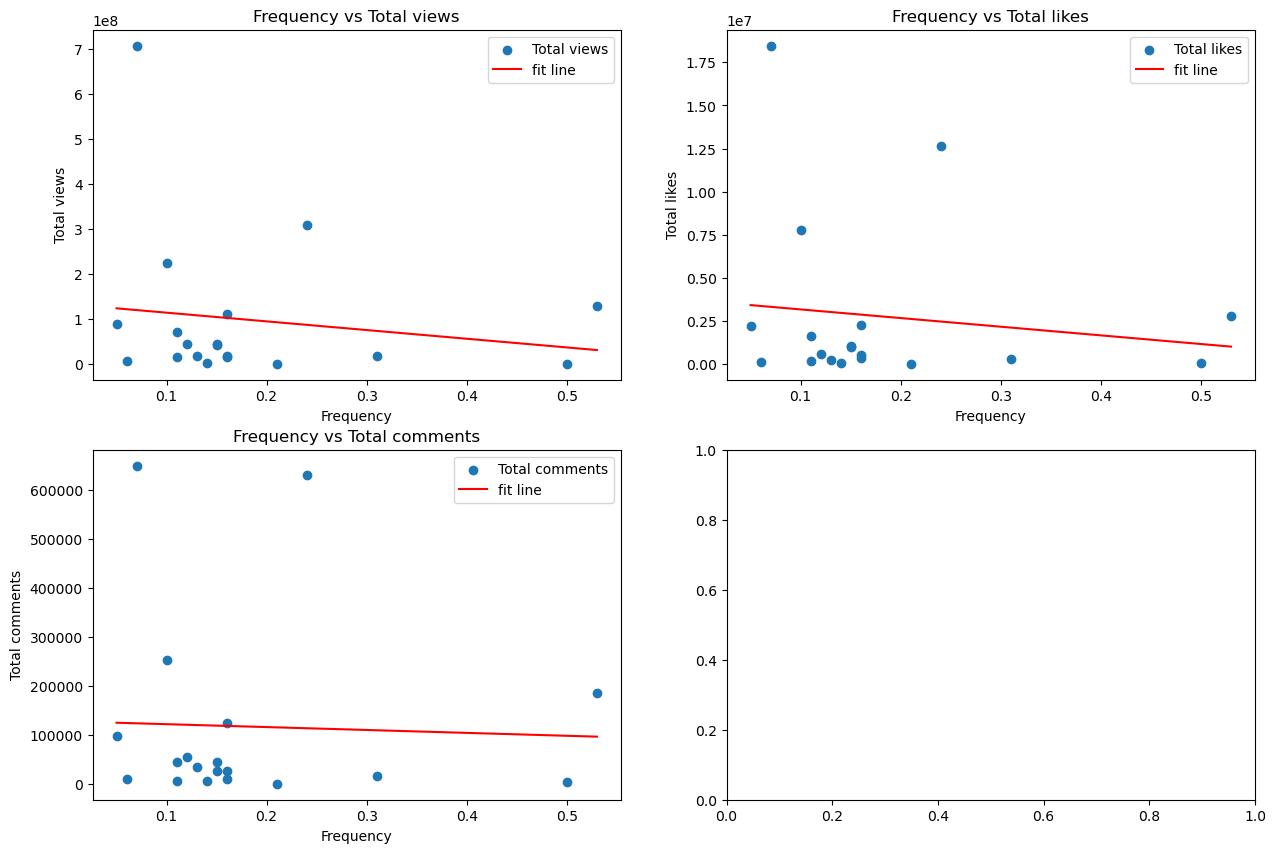

In [228]:
#Scatter plot and fit line
fig,ax=plt.subplots(figsize=(15,10),nrows=2,ncols=2)
for i,feature in enumerate(['Total views','Total likes','Total comments']):
    ax[i//2][i%2].scatter(df_plot['Frequency'],df_plot[feature],label=feature)
    ax[i//2][i%2].set_xlabel('Frequency')
    ax[i//2][i%2].set_ylabel(feature)
    ax[i//2][i%2].set_title('Frequency vs '+feature)
    ax[i//2][i%2].plot(np.unique(df_plot['Frequency']), np.poly1d(np.polyfit(df_plot['Frequency'], df_plot[feature], 1))(np.unique(df_plot['Frequency'])),color='red',label='fit line')
    ax[i//2][i%2].legend()

In [298]:
#Calculate the interaction between viewers and creators
def Create_DataFrame_For3(df_cmt_with_channel)->dict:
    list_channel=cleaned_videos_df['channelTitle'].unique()
    dict_interaction={}
    for channel in list_channel:
        #Number of videos
        delta_time=cleaned_videos_df[cleaned_videos_df['channelTitle']==channel]['published'].max()-\
                cleaned_videos_df[cleaned_videos_df['channelTitle']==channel]['published'].min()
        #Interaction
        channel_df=df_cmt_with_channel[df_cmt_with_channel['channelTitle']==channel]
        dict_interaction[channel]=0
        for row_index,row in channel_df.iterrows():
            if row['author'] is not np.nan:
                if row['author'].lower()[1::] in channel.lower().replace(' ',''):
                    dict_interaction[channel]+=1
        dict_interaction[channel]=round(dict_interaction[channel]/delta_time.days,2)
    df_plot=pd.DataFrame(dict_interaction.items(),columns=['channelTitle','Interaction'])
    return df_plot
df_cmt_with_channel=cleaned_comments_df.merge(cleaned_videos_df[['channelTitle','video_id']],on='video_id',how='left')
df_plot_3=Create_DataFrame_For3(df_cmt_with_channel)

In [299]:
delta_time=cleaned_videos_df[cleaned_videos_df['channelTitle']==channel]['published'].max()-\
                cleaned_videos_df[cleaned_videos_df['channelTitle']==channel]['published'].min()
df_plot_3['View ratio']=cleaned_videos_df.groupby('channelTitle')['view_count'].sum().values/delta_time.days
df_plot_3['Like ratio']=cleaned_videos_df.groupby('channelTitle')['like_count'].sum().values/delta_time.days
df_plot_3['Comment ratio']=cleaned_videos_df.groupby('channelTitle')['comment_count'].sum().values/delta_time.days



In [300]:
df_plot_3

,channelTitle,Interaction,View ratio,Like ratio,Comment ratio
0,DeepLearningAI,0.00,11167.905788,226.296798,6.188424
1,3Blue1Brown,0.02,435773.709975,11372.246921,399.703818
2,Joma Tech,0.00,4355.769089,67.456281,6.398399
3,DataCamp,0.00,1804.123768,51.122537,4.335591
4,CS Dojo,0.03,55496.932882,1364.513547,60.053571
5,sentdex,0.17,9956.525862,317.963054,15.740148
6,StatQuest with Josh Starmer,0.91,44448.325123,1011.931034,27.646552
7,Tech With Tim,0.08,640.687192,5.653325,0.244458
8,365 Data Science,0.24,10377.903941,119.454433,3.939655
9,Data Professor,0.55,27437.160099,645.517241,16.392857


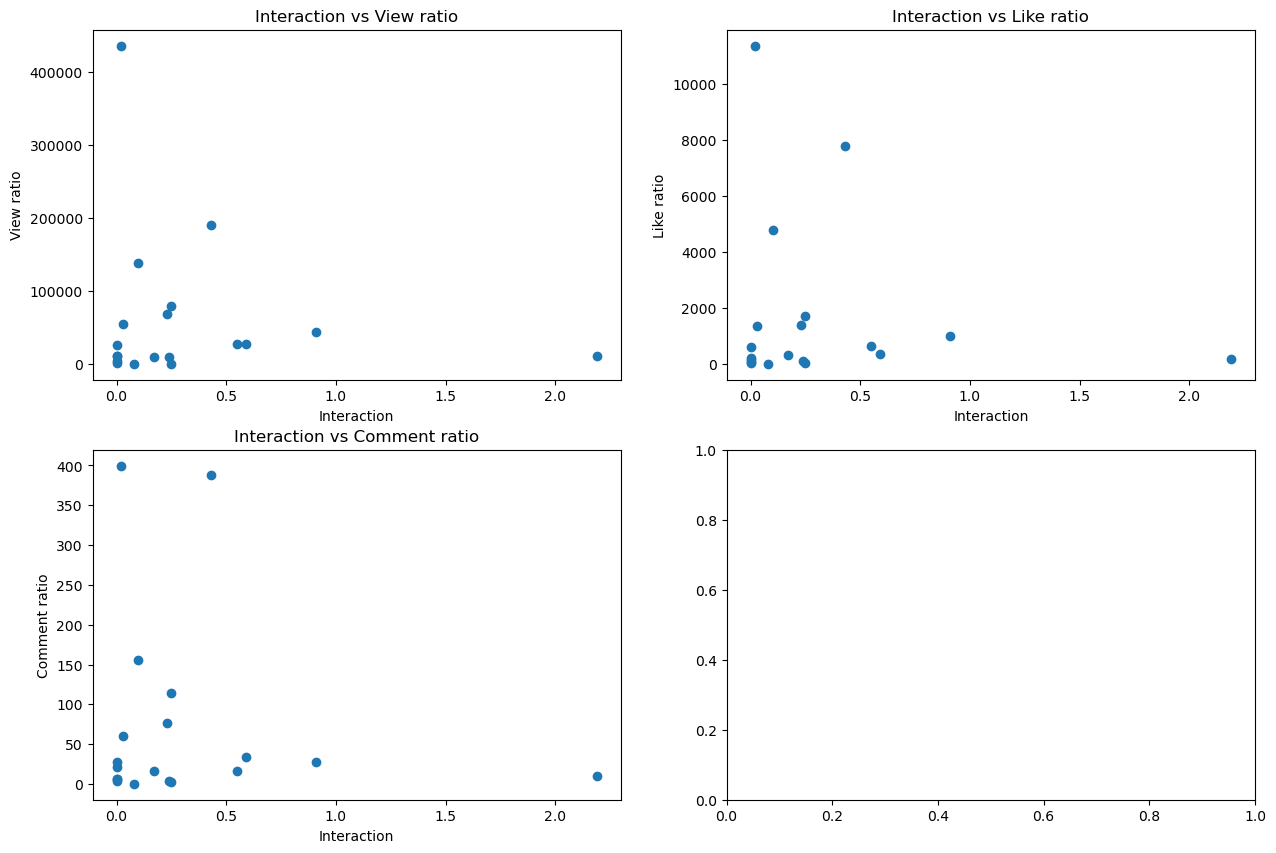

In [301]:
#Scatter plot and fit line
fig,ax=plt.subplots(figsize=(15,10),nrows=2,ncols=2)
for i,feature in enumerate(['View ratio','Like ratio','Comment ratio']):
    ax[i//2][i%2].scatter(df_plot_3['Interaction'],df_plot_3[feature],label=feature)
    ax[i//2][i%2].set_xlabel('Interaction')
    ax[i//2][i%2].set_ylabel(feature)
    ax[i//2][i%2].set_title('Interaction vs '+feature)
   

**YOUR ANSWER**

Example: Is that possible to drop any features that have less effect?

## Making a question? (1.25 points)

After exploring the data, we have a better understanding of the data. Now let's see what questions can be answered with this data.

**A possible question is:** What is the population situation of the countries on the continent today?

**Answering this question will** help us to see the current population status and predictions about the future development of the labor force of the countries on the continent are under consideration.

**How we answer this question**: we will consider the Average Birth Rate and Death Rate for countries across all the year.

### Pre-processing

In [310]:
# YOUR CODE HERE (OPTION) 
try :
    print(1/0.9)
except Exception as e:
    print(e)
finally:
    print('done')

1.1111111111111112
done


In [339]:
a="djdjd"
pri

'0'

### Analyzing to get the answer

Step 01: construct Average Birth Rate dataframe for each country.

In [ ]:
# Create a new dataframe
avg_birthrate_df = pd.DataFrame()

# YOUR CODE HERE

raise NotImplementedError()

In [ ]:
# You can just construct plotting for top countries
# YOUR CODE HERE
raise NotImplementedError()

Step 02: construct Average Death Rate dataframe for each country.

In [ ]:
# Create a new dataframe
avg_deathrate_df = pd.DataFrame()

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# You can just construct plotting for top countries
# YOUR CODE HERE
raise NotImplementedError()

**TODO**: Give your obervation here

...

...

## Making your own question 01? (1.5 points)

**YOUR ANSWER HERE**

### Pre-processing

In [ ]:
# YOUR CODE HERE (OPTION) 

### Analyzing to get the answer

In [ ]:
# YOUR CODE HERE

## Making your own question 02? (1.5 points)

**YOUR ANSWER HERE**

### Pre-processing

In [ ]:
# YOUR CODE HERE (OPTION)
cleaned_comments_df['']

### Analyzing to get the answer

In [ ]:
# YOUR CODE HERE
